# MVA analyze

This notebook contains basic checks of the final dataset. Parts of it can be used later as a tutorial. 

However the goal here is just to compare previous plots with new ones.

## Read data

The same isotopes are read which were present in the previous dataset.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition
from mpl_toolkits.mplot3d import axes3d


fueldata=pd.read_csv('PWR_UOX-MOX_BigDataFrame.csv',header = 0, usecols=['BU','CT','IE','fuelType','Ce141','Nb95','Y91','Zr95','Ce144','Ru106','Cs134','Eu154','Cs137'])
fueldata.head()

,BU,CT,IE,fuelType,Y91,Zr95,Nb95,Ru106,Cs134,Cs137,Ce141,Ce144,Eu154
0,5.0,0.00,1.5,UOX,2.397170e-06,3.166171e-06,1.478996e-06,1.505257e-06,1.924658e-07,0.000008,1.709536e-06,0.000005,2.945246e-08
1,5.0,91.25,1.5,UOX,8.132495e-07,1.178869e-06,1.036539e-06,1.269661e-06,1.769621e-07,0.000008,2.441769e-07,0.000004,2.886479e-08
2,5.0,182.50,1.5,UOX,2.758981e-07,4.389314e-07,4.656899e-07,1.070940e-06,1.627073e-07,0.000008,3.487634e-08,0.000003,2.828885e-08
3,5.0,273.75,1.5,UOX,9.359952e-08,1.634285e-07,1.864606e-07,9.033212e-07,1.496008e-07,0.000007,4.981466e-09,0.000003,2.772439e-08
4,5.0,365.00,1.5,UOX,3.175401e-08,6.084978e-08,7.156699e-08,7.619375e-07,1.375500e-07,0.000007,7.115140e-10,0.000002,2.717120e-08


## Get activities

Calculate activity from the concentrations.

**This part will be distributed with the dataset as example.**

Maybe add half-life for all?


In [2]:
halflife={'Y91':58.5,
          'Zr95':64,
          'Nb95':35,
          'Ru106':372,
          'Cs134':2.065*365,
          'Cs137':30.1*365,
          'Eu154':8.6*365,
          'Ce141':32.5,
          'Ce144':285
          }

d2s=86400

for iso in halflife:
    fueldata[iso+'A']=fueldata[iso]*1e24*(np.log(2)/(halflife[iso]*d2s))
fueldata.head()

,BU,CT,IE,fuelType,Y91,Zr95,Nb95,Ru106,Cs134,Cs137,...,Eu154,Y91A,Zr95A,Nb95A,Ru106A,Cs134A,Cs137A,Eu154A,Ce141A,Ce144A
0,5.0,0.00,1.5,UOX,2.397170e-06,3.166171e-06,1.478996e-06,1.505257e-06,1.924658e-07,0.000008,...,2.945246e-08,3.287416e+11,3.968863e+11,3.390087e+11,3.246231e+10,2.048577e+09,5.569977e+09,7.527349e+07,4.219944e+11,1.397063e+11
1,5.0,91.25,1.5,UOX,8.132495e-07,1.178869e-06,1.036539e-06,1.269661e-06,1.769621e-07,0.000008,...,2.886479e-08,1.115269e+11,1.477737e+11,2.375906e+11,2.738146e+10,1.883558e+09,5.537918e+09,7.377154e+07,6.027441e+10,1.118922e+11
2,5.0,182.50,1.5,UOX,2.758981e-07,4.389314e-07,4.656899e-07,1.070940e-06,1.627073e-07,0.000008,...,2.828885e-08,3.783594e+10,5.502099e+10,1.067433e+11,2.309584e+10,1.731832e+09,5.506043e+09,7.229955e+07,8.609129e+09,8.961557e+10
3,5.0,273.75,1.5,UOX,9.359952e-08,1.634285e-07,1.864606e-07,9.033212e-07,1.496008e-07,0.000007,...,2.772439e-08,1.283599e+10,2.048611e+10,4.273963e+10,1.948099e+10,1.592328e+09,5.474351e+09,7.085694e+07,1.229661e+09,7.177401e+10
4,5.0,365.00,1.5,UOX,3.175401e-08,6.084978e-08,7.156699e-08,7.619375e-07,1.375500e-07,0.000007,...,2.717120e-08,4.354661e+09,7.627650e+09,1.640425e+10,1.643191e+10,1.464062e+09,5.442842e+09,6.944312e+07,1.756353e+08,5.748453e+10


## PCA comparison

A subset is created which matches the previous BU-CT-IE range, and a PCA is performed.

The plot seems to look exectly the same.

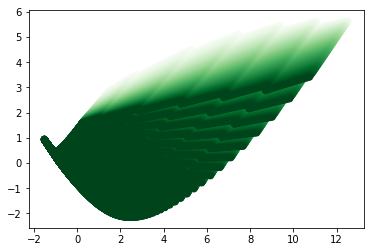

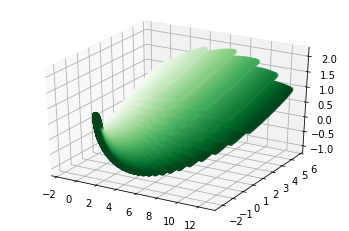

In [3]:
features = ['Ru106', 'Cs134', 'Eu154', 'Cs137']
subfuel=fueldata[(fueldata["BU"]>= 15) & (fueldata["IE"] <= 5.5) & (fueldata["fuelType"] == 'UOX')]
X = subfuel.loc[:, features].values
X = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=4)
pca.fit(X)
Xt = pca.transform(X)

plt.scatter(Xt[:,0],Xt[:,1],c=subfuel.IE, cmap='Greens')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], c=subfuel.BU, cmap='Greens');
plt.show()

## Feature ranking

We are going to rank the features based on their correlation scores to a selected target (BU in this example)

$corr(x_iy)=\frac{E(x_i\cdot y)-E(x_i)\cdot E(y)}{\sigma_{x_i}\sigma_y}\cdot 100 (\%)$

Values seem to be the same up to 3-4 digits.

In [4]:
y = subfuel.loc[:,'BU'].values
corrs=[]
for i in features:
    xi=subfuel[i]
    xiy=xi*y
    covi=np.mean(xiy)-np.mean(xi)*np.mean(y)
    corri=covi/(np.std(xi)*np.std(y))
    corrs.append(corri*100)

inds = (-np.array(corrs)).argsort()
for iso, corr, i in zip(np.array(features)[inds],np.array(corrs)[inds], inds):
    print(iso,'\t', corr, '\t', i)

Cs137 	 65.02153719105935 	 3
Eu154 	 40.39715783220464 	 2
Cs134 	 21.141863651623726 	 1
Ru106 	 8.581996876081128 	 0


## First UOX vs MOX test

Plot the Eu-154 concentration, since that has a more complicated creation path, so one expects to create different concentrations for MOX and UOX. This was not done before, so it can be compared.

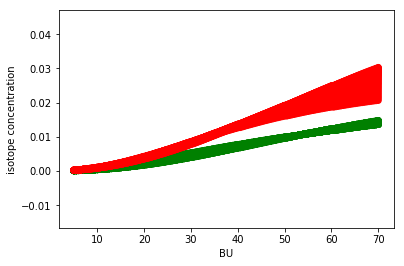

In [5]:
subfuel=fueldata[(fueldata["CT"]== 5*365)]
color= ['green' if l == 'UOX' else 'red' for l in subfuel.fuelType]
plt.scatter(subfuel.BU,subfuel.Eu154*10000,color=color)#c=subfuel.IE, cmap='Greens')
plt.xlabel('BU')
plt.ylabel('isotope concentration')
plt.show()

## Second UOX vs MOX test

Mimic http://uu.diva-portal.org/smash/get/diva2:1172034/FULLTEXT01.pdf Fig. 7.3 on page 50.

0-1y fuel, so all the nuclide activities are included, normalized to sum=1.

It is not as nice as in Fig. 7.3, mainly because 0-1y means only 5 discrate CT values in this dataset. However the separate MOX and UOX clusters appear. 

In [6]:
subfuel=fueldata[(fueldata["CT"]>=0*365) & (fueldata["CT"] <= 1*365)]

features=['Ce141A','Nb95A','Y91A','Zr95A','Ce144A','Ru106A','Cs134A','Eu154A','Cs137A']

X = subfuel.loc[:, features]
X[features]=X[features].apply(lambda row: row/sum(row.values), axis=1)
X = X.values
X = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=9)
pca.fit(X)
Xt = pca.transform(X)


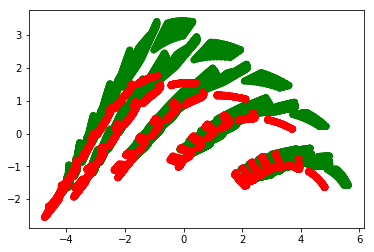

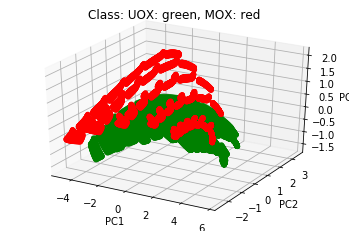

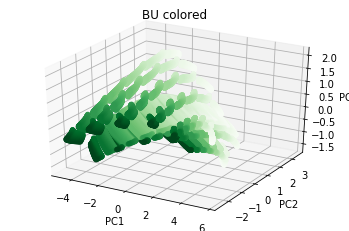

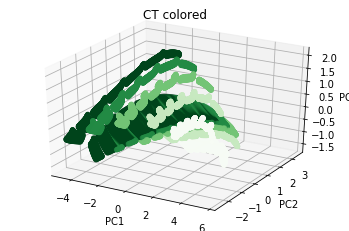

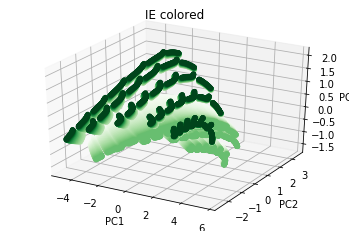

In [7]:
color= ['green' if l == 'UOX' else 'red' for l in subfuel.fuelType]

%matplotlib inline
plt.figure()
plt.scatter(Xt[:,0],Xt[:,1],color=color)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], color=color);
ax.set_title('Class: UOX: green, MOX: red')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], c=subfuel.BU, cmap='Greens');
ax.set_title('BU colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], c=subfuel.CT, cmap='Greens');
ax.set_title('CT colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], c=subfuel.IE, cmap='Greens');
ax.set_title('IE colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

## Second UOX vs MOX test

Mimic http://uu.diva-portal.org/smash/get/diva2:1172034/FULLTEXT01.pdf Fig. 7.4 and Fig. 7.5 on page 51 and 52.

1-10y fuel, so only some of the nuclide activities are included, normalized to sum=1.

Hard to visually compare, nevertheless the UOX seems to have a "saddle" shape in or case as well, whereas the MOX has a simpler shape.
 

In [8]:
subfuel=fueldata[(fueldata["CT"]>=1*365) & (fueldata["CT"] <= 10*365) & (fueldata["BU"] <= 60)].sample(n=10000,random_state=1)
subfuelUOX=subfuel[(subfuel["fuelType"] == 'UOX')]
subfuelMOX=subfuel[(subfuel["fuelType"] == 'MOX')]

features=['Ce144A','Ru106A','Cs134A','Eu154A','Cs137A']

XUOX = subfuelUOX.loc[:, features]
XMOX = subfuelMOX.loc[:, features]

XUOX[features]=XUOX[features].apply(lambda row: row/sum(row.values), axis=1)
XMOX[features]=XMOX[features].apply(lambda row: row/sum(row.values), axis=1)

XUOX = XUOX.values
XMOX = XMOX.values
#XUOX = StandardScaler().fit_transform(XUOX)
#XMOX = StandardScaler().fit_transform(XMOX)

pcaU = decomposition.PCA(n_components=5)
pcaU.fit(XUOX)
XtUOX = pcaU.transform(XUOX)

pcaM = decomposition.PCA(n_components=5)
pcaM.fit(XUOX)
XtMOX = pcaM.transform(XMOX)

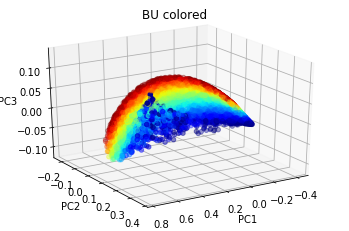

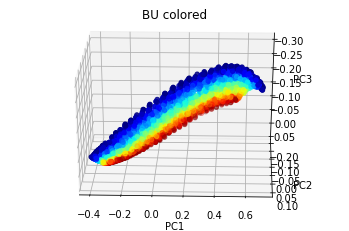

In [9]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(XtUOX[:,0], XtUOX[:,1], XtUOX[:,2], c=subfuelUOX.BU, cmap='jet');
ax.set_title('BU colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=25., azim=58)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(XtMOX[:,0], XtMOX[:,1], XtMOX[:,2], c=subfuelMOX.BU, cmap='jet');
ax.set_title('BU colored')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(elev=-154, azim=-92)
plt.show()